In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


TensorFlow version: 2.9.2


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


I've removed the Impressionism and Post-Impressionism genres due to their large wieghts in the dataset. This experiment is to see if having more evenly distributed weights will yeild higher accuracy.

In [ ]:
labels = ['Abstractism', 'Baroque', 'Byzantine', 'Cubism', 'Expressionism', 'High_Renaissance',
              'Mannerism', 'Muralism', 'Northern_Renaissance', 'Pop_Art',
              'Primitivism', 'Proto_Renaissance', 'Realism', 'Romaticism',
             'Suprematism', 'Surrealism', 'Symbolism']

In [ ]:
batch_size = 10


data_generator = ImageDataGenerator(validation_split=0.25,
                                   rescale=1.0/255.0,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                  )

train_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

valid_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

STEP_PER_EPOCH_TRAIN = train_data.n//train_data.batch_size
STEP_PER_EPOCH_VALID = valid_data.n//valid_data.batch_size
print("Total number of batches =", STEP_PER_EPOCH_TRAIN, "and", STEP_PER_EPOCH_VALID)

Found 3783 images belonging to 17 classes.
Found 1252 images belonging to 17 classes.
Total number of batches = 378 and 125


In [ ]:
from tensorflow.keras import layers, models

CNN_model = models.Sequential()
CNN_model.add(layers.RandomFlip("horizontal_and_vertical"))
CNN_model.add(layers.RandomRotation(0.3))
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(17, activation='softmax'))
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(x=train_data, epochs=5, batch_size=10, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/5
378/378 [==============================] - 1495s 4s/step - loss: 3.6116 - accuracy: 0.2218 - val_loss: 3.0326 - val_accuracy: 0.1773
Epoch 2/5
378/378 [==============================] - 292s 772ms/step - loss: 2.3096 - accuracy: 0.2966 - val_loss: 3.2639 - val_accuracy: 0.1789
Epoch 3/5
378/378 [==============================] - 285s 754ms/step - loss: 2.2237 - accuracy: 0.3294 - val_loss: 3.3765 - val_accuracy: 0.1869
Epoch 4/5
378/378 [==============================] - 293s 776ms/step - loss: 2.1924 - accuracy: 0.3342 - val_loss: 3.1171 - val_accuracy: 0.2053
Epoch 5/5
378/378 [==============================] - 287s 760ms/step - loss: 2.1511 - accuracy: 0.3374 - val_loss: 3.8812 - val_accuracy: 0.1558


Still not seeing good validation accuracy. Trying to adjust the model for another experiment and also increasing batch size.

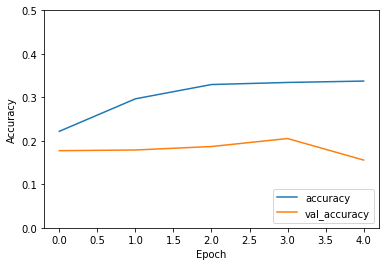

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')

In [ ]:
batch_size = 50


data_generator = ImageDataGenerator(validation_split=0.25,
                                   rescale=1.0/255.0,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                  )

train_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

valid_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

STEP_PER_EPOCH_TRAIN = train_data.n//train_data.batch_size
STEP_PER_EPOCH_VALID = valid_data.n//valid_data.batch_size
print("Total number of batches =", STEP_PER_EPOCH_TRAIN, "and", STEP_PER_EPOCH_VALID)

Found 3783 images belonging to 17 classes.
Found 1252 images belonging to 17 classes.
Total number of batches = 75 and 25


In [ ]:
CNN_model = models.Sequential()
CNN_model.add(layers.RandomFlip("horizontal_and_vertical"))
CNN_model.add(layers.RandomRotation(0.3))
CNN_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(17, activation='softmax'))
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(x=train_data, epochs=5, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/5
75/75 [==============================] - 285s 4s/step - loss: 2.4154 - accuracy: 0.2218 - val_loss: 2.5275 - val_accuracy: 0.1901
Epoch 2/5
75/75 [==============================] - 286s 4s/step - loss: 2.1619 - accuracy: 0.2984 - val_loss: 2.5101 - val_accuracy: 0.1853
Epoch 3/5
75/75 [==============================] - 296s 4s/step - loss: 2.0252 - accuracy: 0.3512 - val_loss: 2.5493 - val_accuracy: 0.1853
Epoch 4/5
75/75 [==============================] - 289s 4s/step - loss: 1.9650 - accuracy: 0.3678 - val_loss: 2.8093 - val_accuracy: 0.1805
Epoch 5/5
75/75 [==============================] - 278s 4s/step - loss: 1.8908 - accuracy: 0.3932 - val_loss: 2.6892 - val_accuracy: 0.1845


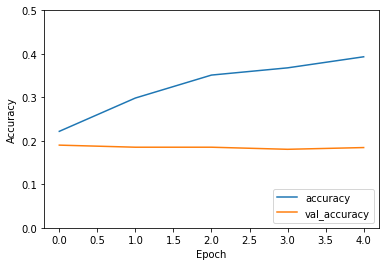

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')

Still not seeing good results, now testing with a complex CNN and doing data augmentation using the ImageDataGenerator instead of in the model.

In [ ]:
batch_size = 50


data_generator = ImageDataGenerator(validation_split=0.25,
                                   rescale=1.0/255.0,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                  )

train_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

valid_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=False,
                                                    classes=labels
                                                   )

STEP_PER_EPOCH_TRAIN = train_data.n//train_data.batch_size
STEP_PER_EPOCH_VALID = valid_data.n//valid_data.batch_size
print("Total number of batches =", STEP_PER_EPOCH_TRAIN, "and", STEP_PER_EPOCH_VALID)

Found 3783 images belonging to 17 classes.
Found 1252 images belonging to 17 classes.
Total number of batches = 75 and 25


In [ ]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(17, activation='softmax'))
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(x=train_data, epochs=5, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/5
75/75 [==============================] - 851s 11s/step - loss: 2.4448 - accuracy: 0.2060 - val_loss: 2.5032 - val_accuracy: 0.2093
Epoch 2/5
75/75 [==============================] - 845s 11s/step - loss: 2.1925 - accuracy: 0.2904 - val_loss: 2.4371 - val_accuracy: 0.2173
Epoch 3/5
75/75 [==============================] - 860s 11s/step - loss: 2.0701 - accuracy: 0.3282 - val_loss: 2.3597 - val_accuracy: 0.2300
Epoch 4/5
75/75 [==============================] - 849s 11s/step - loss: 2.0031 - accuracy: 0.3552 - val_loss: 2.4441 - val_accuracy: 0.2380
Epoch 5/5
75/75 [==============================] - 853s 11s/step - loss: 1.8591 - accuracy: 0.4064 - val_loss: 2.4932 - val_accuracy: 0.2292


In [ ]:
from tensorflow.keras import layers, models

CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(17, activation='softmax'))
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(x=train_data, epochs=5, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/5
75/75 [==============================] - 1584s 21s/step - loss: 2.3518 - accuracy: 0.2416 - val_loss: 2.5324 - val_accuracy: 0.2412
Epoch 2/5
75/75 [==============================] - 393s 5s/step - loss: 2.0707 - accuracy: 0.3415 - val_loss: 2.4257 - val_accuracy: 0.2548
Epoch 3/5
75/75 [==============================] - 397s 5s/step - loss: 1.9402 - accuracy: 0.3737 - val_loss: 2.5497 - val_accuracy: 0.2260
Epoch 4/5
75/75 [==============================] - 390s 5s/step - loss: 1.7588 - accuracy: 0.4492 - val_loss: 2.5657 - val_accuracy: 0.2364
Epoch 5/5
75/75 [==============================] - 394s 5s/step - loss: 1.6002 - accuracy: 0.4980 - val_loss: 2.6820 - val_accuracy: 0.2724


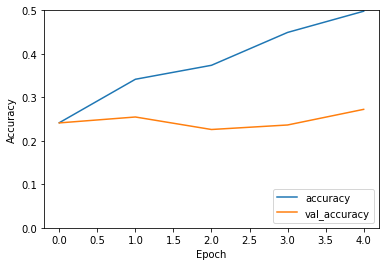

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')

Saw highest validation accuracy so far on the fifth epoch so training for an additional 3 epochs to see if we can continue to create higher accuracy.

In [ ]:
history = CNN_model.fit(x=train_data, epochs=3, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/3
75/75 [==============================] - 391s 5s/step - loss: 1.4221 - accuracy: 0.5526 - val_loss: 2.8488 - val_accuracy: 0.2644
Epoch 2/3
75/75 [==============================] - 395s 5s/step - loss: 1.2145 - accuracy: 0.6234 - val_loss: 3.0642 - val_accuracy: 0.2708
Epoch 3/3
75/75 [==============================] - 388s 5s/step - loss: 1.0557 - accuracy: 0.6756 - val_loss: 3.3656 - val_accuracy: 0.2955


In [ ]:
history = CNN_model.fit(x=train_data, epochs=3, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

Epoch 1/3
75/75 [==============================] - 400s 5s/step - loss: 0.8682 - accuracy: 0.7439 - val_loss: 3.3836 - val_accuracy: 0.2716
Epoch 2/3
75/75 [==============================] - 390s 5s/step - loss: 0.7648 - accuracy: 0.7710 - val_loss: 3.5652 - val_accuracy: 0.2556
Epoch 3/3
75/75 [==============================] - 388s 5s/step - loss: 0.5872 - accuracy: 0.8216 - val_loss: 3.5204 - val_accuracy: 0.2915


Added Impressionism and Post-Impressionism back in with 100 images in each to balance their weights. Now training the model with the updated data.

In [4]:
labels = ['Abstractism', 'Baroque', 'Byzantine', 'Cubism', 'Expressionism', 'High_Renaissance',
             'Impressionism', 'Mannerism', 'Muralism', 'Northern_Renaissance', 'Pop_Art',
             'Post-Impressionism', 'Primitivism', 'Proto_Renaissance', 'Realism', 'Romaticism',
             'Suprematism', 'Surrealism', 'Symbolism']

In [5]:
batch_size = 50


data_generator = ImageDataGenerator(validation_split=0.25,
                                   rescale=1.0/255.0,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                  )

train_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=labels
                                                   )

valid_data = data_generator.flow_from_directory(directory='/content/gdrive/My Drive/Data/genres/',
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=False,
                                                    classes=labels
                                                   )

STEP_PER_EPOCH_TRAIN = train_data.n//train_data.batch_size
STEP_PER_EPOCH_VALID = valid_data.n//valid_data.batch_size
print("Total number of batches =", STEP_PER_EPOCH_TRAIN, "and", STEP_PER_EPOCH_VALID)

Found 3921 images belonging to 19 classes.
Found 1298 images belonging to 19 classes.
Total number of batches = 78 and 25


In [ ]:
from tensorflow.keras import layers, models

CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(19, activation='softmax'))
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training one epoch at a time to allow saving it if the accuracy increases between epochs. This will leave the most accurate model saved.

In [ ]:
history = CNN_model.fit(x=train_data, epochs=1, batch_size=50, steps_per_epoch=STEP_PER_EPOCH_TRAIN, validation_data=valid_data)

78/78 [==============================] - 430s 6s/step - loss: 0.4569 - accuracy: 0.8702 - val_loss: 4.2873 - val_accuracy: 0.2558


In [ ]:
CNN_model.save('/content/gdrive/My Drive/Data/models/my_model')

In [7]:
CNN_model = tf.keras.models.load_model('/content/gdrive/My Drive/Data/models/my_model')

Ran the above three cells to accomplish saving the model. Final model had 28.19% accuracy after 9 epochs. Total of 13 epochs ran.

In [ ]:
CNN_model.evaluate(x=valid_data, batch_size=50, steps=STEP_PER_EPOCH_VALID)

26/26 [==============================] - 46s 2s/step - loss: 3.3225 - accuracy: 0.2915


[3.3224985599517822, 0.29153844714164734]

Seeing 29.15% on the saved models accuracy.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = CNN_model.predict(valid_data, STEP_PER_EPOCH_VALID)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_data.classes, y_pred)

26/26 [==============================] - 47s 2s/step
Confusion Matrix


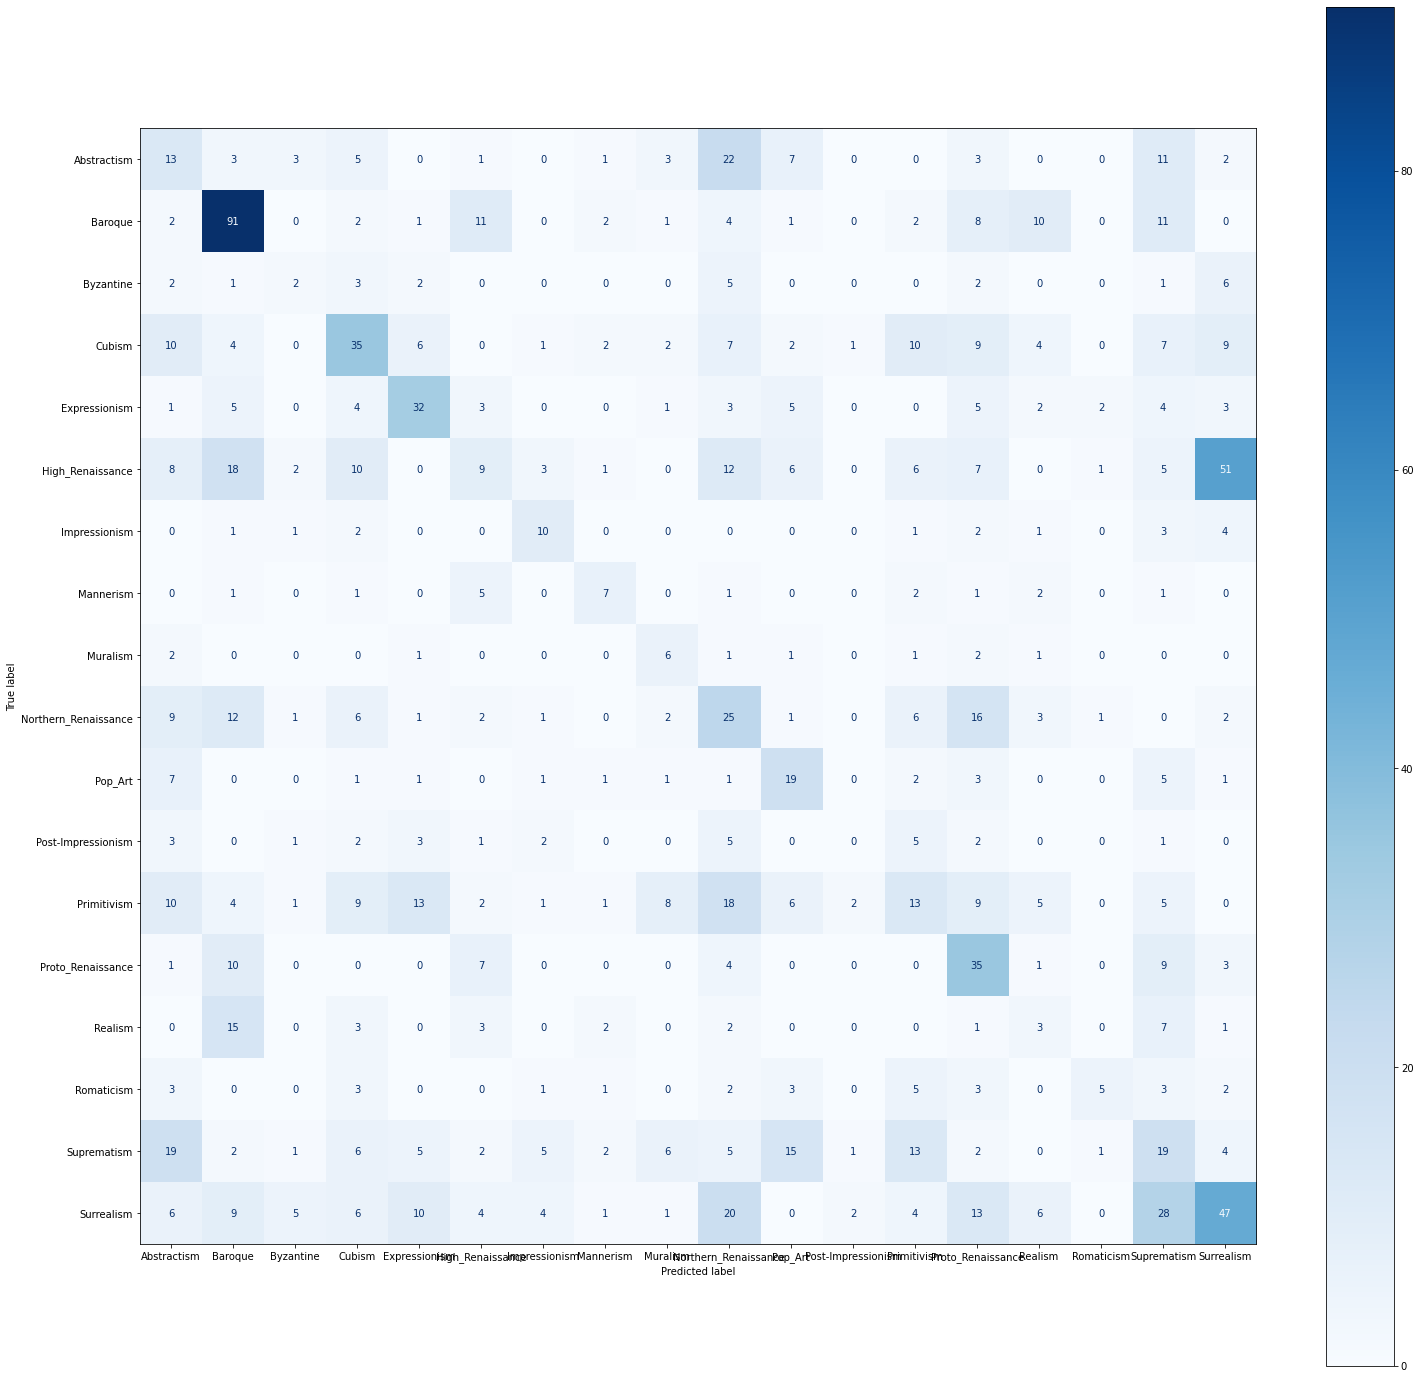

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(25, 25))

disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.show()